<a href="https://colab.research.google.com/github/Rkipz19/AI-Coursework-2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Downaload and Upload Diamonds dataset

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [5]:
df = pd.read_csv("diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Question 2: Data Cleaning, Exploratory Data Analysis, and creating sample of randomly selected records

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum() # counting all null values

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [9]:
df.nunique()#shows how many unique values are there in each column

,0
Unnamed: 0,53940
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552


In [10]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
ct = df['color']
ct.value_counts()


,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [12]:
clarity = df['clarity']
clarity.value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [13]:
cut = df['cut']
cut.value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [25]:
df2 = df.groupby('cut')[['price']].mean().sort_values(by="price",ascending=False)
df2

,price
cut,
Premium,4584.257704
Fair,4358.757764
Very Good,3981.759891
Good,3928.864452
Ideal,3457.541970


In [14]:
df3 = df.groupby('clarity')[['price']]
display = df3.mean().sort_values(by="price",ascending=False)
display

,price
clarity,
SI2,5063.028606
SI1,3996.001148
VS2,3924.989395
I1,3924.168691
VS1,3839.455391
VVS2,3283.737071
IF,2864.839106
VVS1,2523.114637


<Axes: >

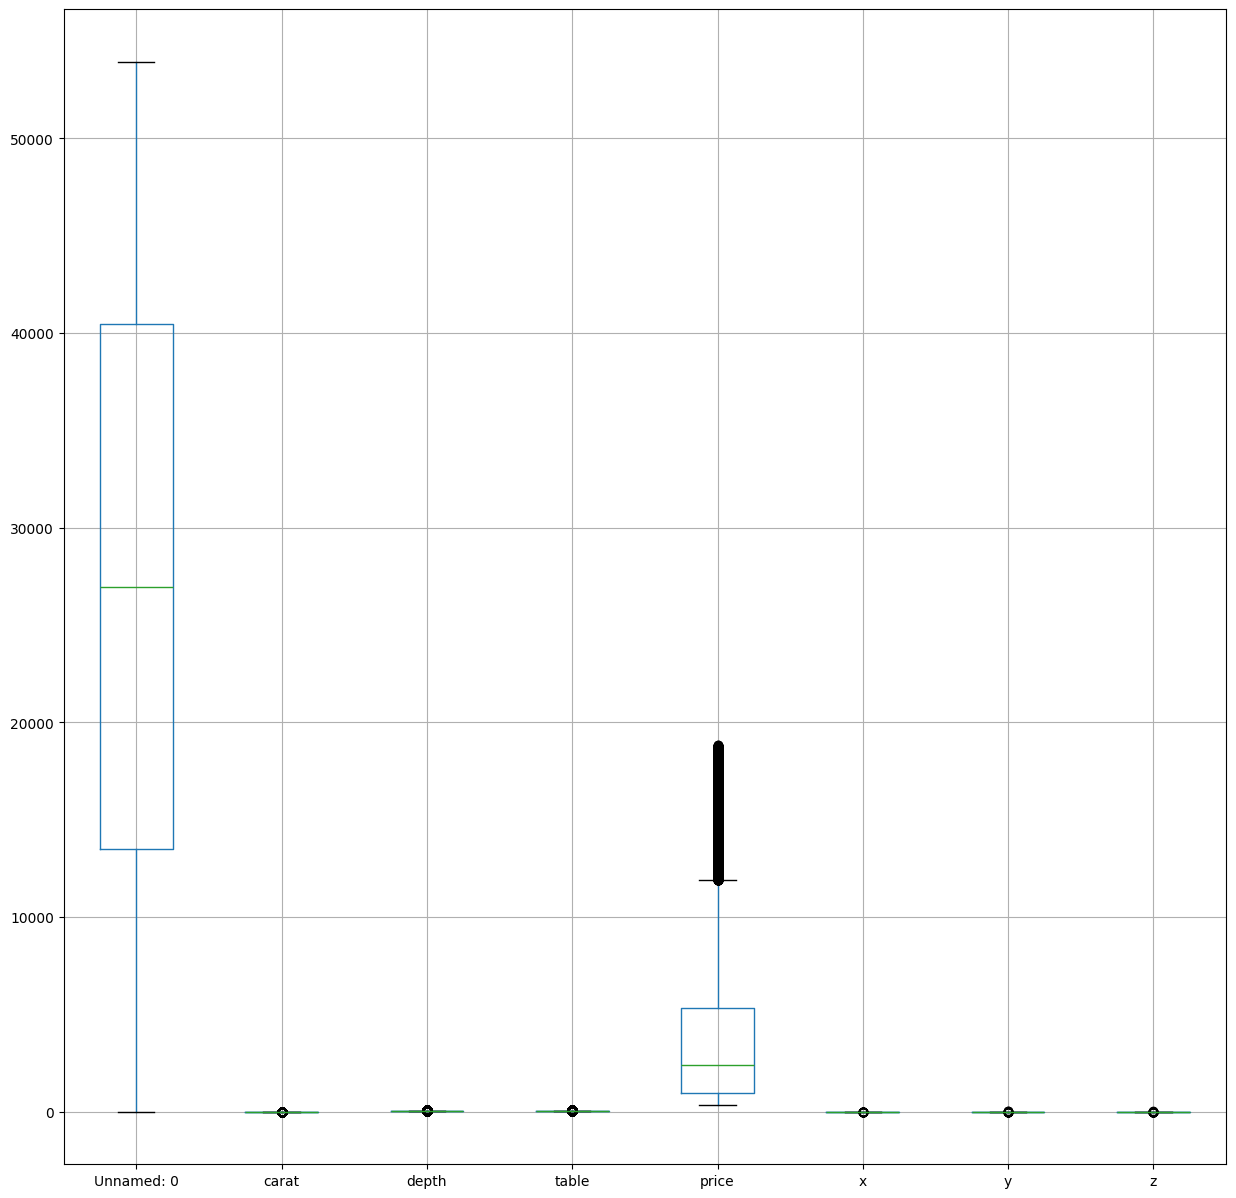

In [15]:
df.boxplot(figsize=(15,15))

1. The diamonds in the dataset are categorized into 8 different colors and this is G, E, F, H, D, I, J. G is the most common color of diamonds.
2. Diamond cut is categorized into 5 types: 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair'. Diamonds of 'Ideal' cut are the most but least in terms of the average prices, 'Premuim' cut having the highest average  out of the different categories.
3. Diamond clarity is categorized into 8 different types: 'SI2', 'SI1', 'VS2', 'I1', 'VS1', 'VVS2', 'IF', 'VVS1'. SI2 having the highest average prices across the different types and WS1 having the lowest average prices.


In [16]:
diamonds_model = df.sample(n=12500,random_state=42)

Question 3: Linear regression algorithm

In [17]:
diamondsModelDummies = pd.get_dummies(diamonds_model, columns=['cut','color','clarity'], drop_first=True)
diamondsModelDummies

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1388,1389,0.24,62.1,56.0,559,3.97,4.00,2.47,False,True,...,False,False,False,False,False,False,False,False,True,False
50052,50053,0.58,60.0,57.0,2201,5.44,5.42,3.26,False,False,...,False,False,False,False,False,False,False,False,False,True
41645,41646,0.40,62.1,55.0,1238,4.76,4.74,2.95,False,True,...,False,False,False,False,False,False,False,False,False,True
42377,42378,0.43,60.8,57.0,1304,4.92,4.89,2.98,False,False,...,False,False,False,False,False,False,False,False,False,True
17244,17245,1.55,62.3,55.0,6901,7.44,7.37,4.61,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190,20191,1.51,62.8,56.0,8637,7.22,7.30,4.56,False,False,...,False,False,False,False,False,True,False,False,False,False
369,370,1.00,66.4,59.0,2808,6.16,6.09,4.07,False,False,...,False,False,False,False,False,False,False,False,False,False
28714,28715,0.23,61.3,60.0,680,4.01,3.95,2.44,False,False,...,False,False,False,False,False,False,False,False,True,False
5030,5031,1.01,61.7,60.0,3749,6.34,6.40,3.93,False,False,...,False,True,False,False,False,True,False,False,False,False


In [18]:
model = LinearRegression()

In [19]:
X = diamondsModelDummies.drop('price', axis='columns')#we drop price because its going to be our y


In [20]:
y=diamondsModelDummies.price#we use the price as our y

In [50]:
model.fit(X,y)#we are training our model

LinearRegression()

In [51]:
#accuracy of the developed model
model.score(X,y)#Here it calculated all of the predicted values for all rows in X and then it compared the predicated values with actual values which is y then score was calculated

0.8601350653874272

Question 4: PCA to 2 features of continuous variables with strong correlation to price feature

In [23]:
continousVariables = ['carat', 'depth', 'table','x','y','z']#storing array for continous features
corr = diamonds_model[continousVariables + ['price']].corr()['price'].sort_values(ascending=False)
corr


,price
price,1.000000
carat,0.921710
y,0.887917
x,0.885799
z,0.879541
table,0.143051
depth,-0.029825


In [27]:
scv = ['carat', 'x','y','z']#storing the strong correlation variables
X1 = diamonds_model[scv]
y1 = diamonds_model['price']

#standardize the data
scaler = StandardScaler()
scaledX = scaler.fit_transform(X1)

In [36]:
pca = PCA(n_components=2)#performing PCA to reduce the dimension to 2 features. Looks for the direction in your data where there's the most variance.
pcaX = pca.fit_transform(scaledX)

In [52]:
model.fit(pcaX,y1)

LinearRegression()

In [53]:
model.score(pcaX,y1)

0.8541868669681941

Question 5: Lasso and Ridge regularization technique

In [46]:
#1. Lasso regularization technique - keeps important features and sets the rest to zero
lassoModel = Lasso(alpha=0.1)#alpha = penalty strength. "Penalty"- makes some coefficients exactly zero. The features are completely dropped from model.
lassoModel.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+10, tolerance: 1.974e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [47]:
lassoModel.score(X,y)

0.8600921352738874

In [48]:
#2 Ridge regularization technique
ridgeModel = Ridge(alpha=0.1)
ridgeModel.fit(X,y)

Ridge(alpha=0.1)

In [49]:
ridgeModel.score(X,y)

0.8601349057216783

Question 6: Comparison of the four models



1. Linear Regression algorithm registered the highest number accuracy since it fits a line using all features, no penalities or restrictions.(0.860135)
2. Ridge regression, adds a penalty to shrink big coefficients this controls overfitting. It follows after Linear regression(0.860134)
3. Lasso Regression, adds a penalty that can shrink some coefficients to zero through selecting important features(0.86009)
4. PCA + Regression, is the one that recorded the lowest accuracy of 0.85418. One reason could be that since it reduces dimensions, there might be lose of information.(0.85418)